# Advertisement  Classification Analysis


In [ ]:
In this project we will be working with an advertisement classification data set.Here we considering "Clicked on Ad" column as 
target column, which indicating whether or not a particular internet user clicked on an Advertisement and all other colums are 
considered as features.Here we are trying to analyse the relation between target column and other feature columns.

The advertising_classification.csv dataset contains 1000 observations (rows) and 10 features (columns).

This data set contains the following features(Columns):

'Daily Time Spent on Site': How much time user spent on that site in minutes
'Age': user age in years
'Area Income': Avg. Income of geographical area of that user
'Daily Internet Usage': Avg. minutes a day that user is on the internet
'Ad Topic Line': Headline of the advertisement
'City': City of user
'Gender': Gender of that user(female:0,male:1)
'Country': Country of user
'Timestamp': Time at which the user clicked on Ad or closed window
'Clicked on Ad': 0 or 1 indicated clicking on Ad(1:clicking,0:not clicking)


# 1 Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

In [3]:
import cufflinks as cf

In [4]:
py.offline.init_notebook_mode(connected=True)

In [5]:
cf.go_offline()

In [67]:
#print(py.__version__)

5.1.0


In [58]:
#!pip install plotly
#!pip install cufflinks

# 2 Load the Data Set

In [8]:
df=pd.read_csv(r"F:\project dataset\advertising_classification.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11-02-2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22-04-2016 02:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,01-02-2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24-03-2016 02:35,0


# 3 Test the dataset clean or not

In [7]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# 4 Print the shape of data

In [8]:
df.shape

(1000, 10)

# 5 Display the first 10 raws

In [9]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,19-05-2016 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,28-01-2016 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,07-03-2016 01:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,18-04-2016 09:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,11-07-2016 01:42,0


# 6 Display the last 10 raws

In [10]:
df.tail(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
990,35.79,44,33813.08,165.62,Enterprise-wide tangible model,North Katie,1,Tonga,20-04-2016 13:36,1
991,38.96,38,36497.22,140.67,Versatile mission-critical application,Mauricefurt,1,Comoros,21-07-2016 16:02,1
992,69.17,40,66193.81,123.62,Extended leadingedge solution,New Patrick,0,Montenegro,06-03-2016 11:36,1
993,64.20,27,66200.96,227.63,Phased zero tolerance extranet,Edwardsmouth,1,Isle of Man,11-02-2016 23:45,0
994,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,04-04-2016 03:57,1
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11-02-2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22-04-2016 02:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,01-02-2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24-03-2016 02:35,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,03-06-2016 21:43,1


# 7 Print information and summary of data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [14]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# 8 Count the number of the people who is clicking and not clicking the ad while visiting the site and show on pie chart

In [11]:
add=df["Clicked on Ad"].value_counts()

In [12]:
add

1    500
0    500
Name: Clicked on Ad, dtype: int64

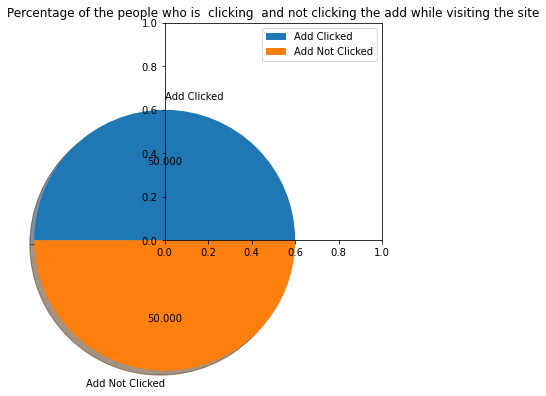

In [13]:
plt.pie(add,shadow=True,autopct="%0.3f",labels=["Add Clicked","Add Not Clicked"],frame=True,radius=0.6)
plt.title("Percentage of the people who is  clicking  and not clicking the add while visiting the site")
plt.legend(loc="upper right")
plt.show()


# 9 Count the number of females,males  and  show on pie chart

In [14]:
gen=df["Gender"].value_counts()
gen

0    519
1    481
Name: Gender, dtype: int64

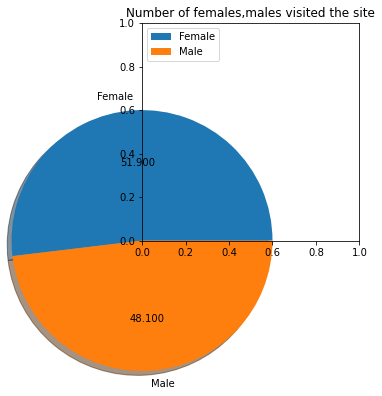

In [17]:
plt.pie(gen,shadow=True,autopct="%0.3f",labels=["Female","Male"],frame=True,radius=0.6)
plt.title("Number of females,males visited the site")
plt.legend(loc="upper left")
plt.show()

# 10 What is the area income according to gender wise

In [39]:
g=df.groupby("Gender")

In [72]:
aig=g["Area Income"].agg(np.mean)
aig

Gender
0    54982.931407
1    55018.417214
Name: Area Income, dtype: float64

In [49]:
dic=dict(aig)
dic

{0: 54982.93140655105, 1: 55018.41721413724}

In [75]:
labels = ["Female","Male"]
avg_area_income = list(dic.values())


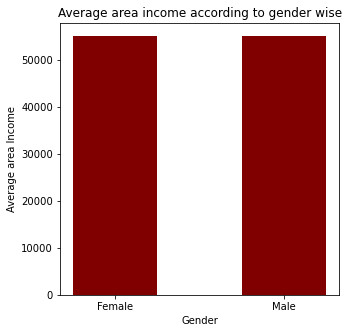

In [88]:
fig = plt.figure(figsize = (5,5))
plt.bar(labels, avg_area_income, color ='maroon',width = 0.5)
plt.xlabel("Gender")
plt.ylabel("Average area Income")
plt.title("Average area income according to gender wise")
plt.show()

# 11 How many user clicking on ads whose age is greater than 50

In [90]:
x=df[(df["Age"]>50)&(df["Clicked on Ad"]==1)]
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
22,41.49,52,32635.70,164.83,Mandatory disintermediate utilization,South John,0,Burundi,20-05-2016 08:49,1
27,51.95,52,58295.82,129.23,Monitored systematic hierarchy,South Cathyfurt,0,Greece,19-07-2016 08:32,1
32,59.05,57,25583.29,169.23,Digitized global capability,North Richardburgh,1,Maldives,15-07-2016 05:05,1
34,57.64,57,45580.92,133.81,Synchronized dedicated service-desk,New Thomas,1,Dominica,15-03-2016 03:12,1
36,62.26,53,56770.79,125.45,Profound stable product,West Aprilport,1,Montenegro,07-04-2016 15:18,1
...,...,...,...,...,...,...,...,...,...,...
924,59.64,51,71455.62,153.12,Re-contextualized human-resource success,Evansville,1,Guyana,03-05-2016 01:09,1
941,78.76,51,66980.27,162.05,Face-to-face modular budgetary management,South Davidhaven,0,Ghana,23-07-2016 04:04,1
966,37.58,52,51600.47,176.70,Exclusive disintermediate Internet solution,Cameronberg,1,Bulgaria,13-04-2016 13:04,1
980,67.26,57,25682.65,168.41,Focused incremental Graphic Interface,North Derekville,1,Bulgaria,27-05-2016 05:54,1


In [93]:
count_row = x.shape[0]  # Gives number of rows
#count_col = x.shape[1]  # Gives number of columns
count_row
#count_col

69

# 12 What is the average area income of people who clicking the ad

In [95]:
#df[df["Clicked on Ad"]==1].Area Income.mean()

In [97]:
r=df.groupby("Clicked on Ad")

In [100]:
area_income=r["Area Income"].agg(np.mean)

In [122]:
area_income

Clicked on Ad
0    61385.58642
1    48614.41374
Name: Area Income, dtype: float64

In [104]:
aai_clicking=dict(area_income)
aai_clicking


{0: 61385.58641999997, 1: 48614.413739999996}

In [132]:
labels = ["Not Clicking","Clicking"]
avg_area_income1 = list(aai_clicking.values())
avg_area_income1

[61385.58641999997, 48614.413739999996]

Text(0, 0.5, 'Average area income')

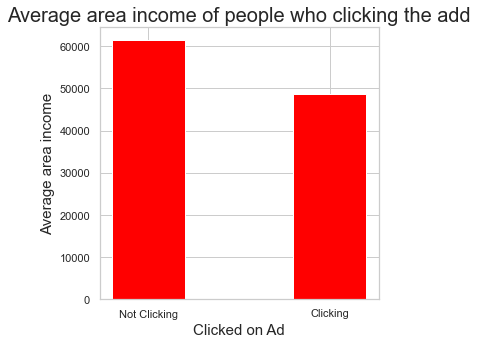

In [150]:
fig = plt.figure(figsize =(5,5))
sns.set_style("whitegrid")
plt.bar(labels,avg_area_income1,color='red',width=0.4)
plt.title("Average area income of people who clicking the add", fontsize = 20)
plt.xlabel("Clicked on Ad", fontsize = 15)
plt.ylabel("Average area income", fontsize = 15)



# 13 What is the average daily internet usage gender wise?

In [5]:
i=df.groupby("Gender")

In [6]:
Diu=i["Daily Internet Usage"].agg(np.mean)
Diu

Gender
0    178.816763
1    181.276923
Name: Daily Internet Usage, dtype: float64

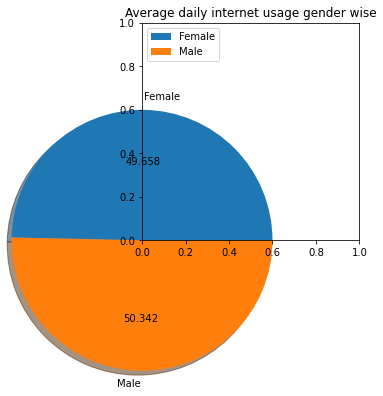

In [7]:
plt.pie(Diu,shadow=True,autopct="%0.3f",labels=["Female","Male"],frame=True,radius=0.6)
plt.title("Average daily internet usage gender wise")
plt.legend(loc="upper left")
plt.show()

# 14 Top 5 least internet use country

In [9]:

a=df.groupby("Country").groups


In [10]:
emptyDict = {}
for i,j in a.items():
    n=df.loc[j,["Daily Internet Usage"]].mean()
    emptyDict[i]=n

In [11]:
emptyDict


{'Afghanistan': Daily Internet Usage    162.33875
 dtype: float64,
 'Albania': Daily Internet Usage    173.744286
 dtype: float64,
 'Algeria': Daily Internet Usage    176.621667
 dtype: float64,
 'American Samoa': Daily Internet Usage    168.35
 dtype: float64,
 'Andorra': Daily Internet Usage    170.205
 dtype: float64,
 'Angola': Daily Internet Usage    175.6775
 dtype: float64,
 'Anguilla': Daily Internet Usage    194.018333
 dtype: float64,
 'Antarctica (the territory South of 60 deg S)': Daily Internet Usage    177.363333
 dtype: float64,
 'Antigua and Barbuda': Daily Internet Usage    164.42
 dtype: float64,
 'Argentina': Daily Internet Usage    181.67
 dtype: float64,
 'Armenia': Daily Internet Usage    168.06
 dtype: float64,
 'Aruba': Daily Internet Usage    207.48
 dtype: float64,
 'Australia': Daily Internet Usage    153.71375
 dtype: float64,
 'Austria': Daily Internet Usage    189.448
 dtype: float64,
 'Azerbaijan': Daily Internet Usage    201.963333
 dtype: float64,
 'Bah

In [12]:
data=pd.DataFrame(emptyDict)
data


,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
Daily Internet Usage,162.33875,173.744286,176.621667,168.35,170.205,175.6775,194.018333,177.363333,164.42,181.67,...,218.912,241.75,214.905,168.037143,161.89,199.715,162.835714,139.343333,152.115,160.605


In [13]:
df_t =data.T#transpose method to swap rows and columns
print(df_t)

                   Daily Internet Usage
Afghanistan                  162.338750
Albania                      173.744286
Algeria                      176.621667
American Samoa               168.350000
Andorra                      170.205000
...                                 ...
Wallis and Futuna            199.715000
Western Sahara               162.835714
Yemen                        139.343333
Zambia                       152.115000
Zimbabwe                     160.605000

[237 rows x 1 columns]


In [14]:
final=df_t.sort_values(by="Daily Internet Usage",ascending=True)
final

,Daily Internet Usage
Montserrat,115.910000
British Indian Ocean Territory (Chagos Archipelago),118.390000
Romania,121.070000
Saint Barthelemy,121.580000
Montenegro,124.535000
...,...
India,235.705000
Bermuda,239.940000
Uzbekistan,241.750000
Malaysia,242.306667


In [15]:
final.iplot(kind='bar',title="Average Daily internet usage of the country in ascending order",
            xTitle='country',yTitle='Avg.Daily Internet Usage')

# 15 Number of cities in each country used for the survey

In [16]:
x={k: g["City"].tolist() for k,g in df.groupby("Country")}

In [17]:
country=[]
city_count=[]
for k,v in x.items():
    #print (k, len(list(filter(None, v))))
    print (k, len(v))
    
    country.append(k)
    city_count.append(len(v))
    

    
    
    
    

Afghanistan 8
Albania 7
Algeria 6
American Samoa 5
Andorra 2
Angola 4
Anguilla 6
Antarctica (the territory South of 60 deg S) 3
Antigua and Barbuda 5
Argentina 2
Armenia 3
Aruba 1
Australia 8
Austria 5
Azerbaijan 3
Bahamas 7
Bahrain 5
Bangladesh 4
Barbados 5
Belarus 6
Belgium 5
Belize 5
Benin 2
Bermuda 1
Bhutan 2
Bolivia 6
Bosnia and Herzegovina 7
Bouvet Island (Bouvetoya) 5
Brazil 5
British Indian Ocean Territory (Chagos Archipelago) 1
British Virgin Islands 3
Brunei Darussalam 5
Bulgaria 6
Burkina Faso 4
Burundi 7
Cambodia 7
Cameroon 5
Canada 5
Cape Verde 1
Cayman Islands 5
Central African Republic 2
Chad 4
Chile 4
China 6
Christmas Island 6
Colombia 2
Comoros 2
Congo 4
Cook Islands 3
Costa Rica 6
Cote d'Ivoire 4
Croatia 6
Cuba 5
Cyprus 8
Czech Republic 9
Denmark 3
Djibouti 2
Dominica 5
Dominican Republic 4
Ecuador 5
Egypt 5
El Salvador 6
Equatorial Guinea 4
Eritrea 7
Estonia 3
Ethiopia 7
Falkland Islands (Malvinas) 4
Faroe Islands 3
Fiji 7
Finland 5
France 9
French Guiana 4
French P

In [18]:
import plotly.graph_objs as go

data = [go.Bar(
   x = country,
   y = city_count
            
)]

fig = go.Figure(data=data)
iplot(fig)

# 16 What is the Average age of the people who use the internet most 

In [83]:
most=df.sort_values(by="Daily Internet Usage",ascending=False)
most

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
247,57.05,41,50278.89,269.96,Seamless full-range website,Port Erinberg,1,Sierra Leone,09-01-2016 03:45,1
30,67.64,35,51473.28,267.01,Programmable asymmetric data-warehouse,Phelpschester,1,Peru,02-07-2016 20:23,0
848,70.39,32,47357.39,261.52,Phased 5thgeneration open system,Sabrinaview,1,Cayman Islands,12-07-2016 10:56,0
367,77.07,40,44559.43,261.02,Face-to-face analyzing encryption,Stephenborough,0,Afghanistan,01-03-2016 10:01,0
617,68.41,38,61428.18,259.76,Grass-roots empowering paradigm,Christopherchester,0,Guinea-Bissau,30-04-2016 15:27,0
...,...,...,...,...,...,...,...,...,...,...
66,63.89,40,51317.33,105.22,Synchronized user-facing core,Jensenborough,0,Rwanda,08-01-2016 00:17,1
85,57.76,41,47861.93,105.15,Triple-buffered scalable groupware,Lake Dustin,0,Puerto Rico,12-06-2016 15:25,1
987,63.37,43,43155.19,105.04,Open-architected full-range projection,Michaelshire,1,Poland,23-03-2016 12:53,1
319,62.06,44,44174.25,105.00,Adaptive contextually-based methodology,Port Paultown,0,Austria,12-04-2016 14:01,1


In [84]:
xyz=most.head(250)
xyz

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
247,57.05,41,50278.89,269.96,Seamless full-range website,Port Erinberg,1,Sierra Leone,09-01-2016 03:45,1
30,67.64,35,51473.28,267.01,Programmable asymmetric data-warehouse,Phelpschester,1,Peru,02-07-2016 20:23,0
848,70.39,32,47357.39,261.52,Phased 5thgeneration open system,Sabrinaview,1,Cayman Islands,12-07-2016 10:56,0
367,77.07,40,44559.43,261.02,Face-to-face analyzing encryption,Stephenborough,0,Afghanistan,01-03-2016 10:01,0
617,68.41,38,61428.18,259.76,Grass-roots empowering paradigm,Christopherchester,0,Guinea-Bissau,30-04-2016 15:27,0
...,...,...,...,...,...,...,...,...,...,...
397,50.52,28,66929.03,219.69,Versatile responsive knowledge user,Davisfurt,0,Saint Kitts and Nevis,03-04-2016 06:17,1
704,76.02,40,73174.19,219.55,Distributed leadingedge orchestration,Lesliefort,0,Malta,13-07-2016 14:30,0
475,75.15,33,71296.67,219.49,Synchronized zero tolerance product,Smithtown,1,France,19-06-2016 18:19,0
295,82.40,36,66744.65,218.97,Implemented bifurcated workforce,Lake Patrick,1,Macedonia,29-06-2016 03:07,0


In [85]:
xyz.Age.mean()

33.348

# 17 Make a group for age below 20,20-35,35-45,above 45 and find out avg.daily internet use
                              
                         


In [48]:
df_new = df.rename(columns={'Daily Internet Usage': 'Daily_Internet_Usage'})

In [49]:
df_new

,Daily Time Spent on Site,Age,Area Income,Daily_Internet_Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11-02-2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22-04-2016 02:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,01-02-2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24-03-2016 02:35,0


In [50]:
one=df_new[df_new["Age"]<20].Daily_Internet_Usage.mean()
one

187.82000000000002

In [51]:
two=df_new[(df_new["Age"]>=20)&(df_new["Age"]<35)].Daily_Internet_Usage.mean()
two

196.39417190775677

In [52]:
three=df_new[(df_new["Age"]>=35)&(df_new["Age"]<=45)].Daily_Internet_Usage.mean()
three

168.60402777777776

In [53]:
four=df_new[(df_new["Age"]>45)].Daily_Internet_Usage.mean()
four

156.02363057324837

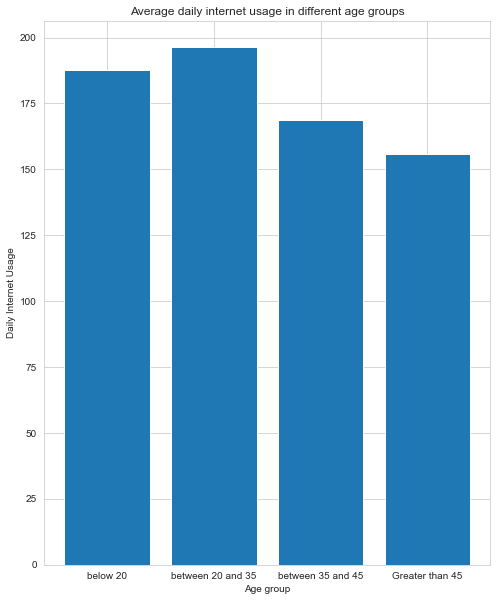

In [56]:
Age_group= ['below 20','between 20 and 35','between 35 and 45','Greater than 45']
Daily_Internet_Usage= [one,two,three,four]
fig = plt.figure(figsize =(8,10))
plt.bar(Age_group,Daily_Internet_Usage)
plt.title('Average daily internet usage in different age groups')
plt.xlabel('Age group')
plt.ylabel('Daily Internet Usage')
plt.show()

# 18 Which is the best time where people are watching the ad?

In [109]:
df1=df
df1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11-02-2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22-04-2016 02:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,01-02-2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24-03-2016 02:35,0


In [110]:
df1["Timestamp"] = pd.to_datetime(df1["Timestamp"]).dt.time

In [111]:
df1["Timestamp"]

0      00:53:00
1      01:39:00
2      20:35:00
3      02:31:00
4      03:36:00
         ...   
995    21:49:00
996    02:07:00
997    17:24:00
998    02:35:00
999    21:43:00
Name: Timestamp, Length: 1000, dtype: object

In [112]:
df1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,00:53:00,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,01:39:00,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,20:35:00,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,02:31:00,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03:36:00,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,02:07:00,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,17:24:00,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,02:35:00,0


In [113]:
df1["Timestamp"].value_counts()

23:08:00    5
23:21:00    5
09:27:00    4
16:02:00    4
19:48:00    4
           ..
21:55:00    1
19:50:00    1
21:02:00    1
03:52:00    1
10:52:00    1
Name: Timestamp, Length: 731, dtype: int64

# 19. Average of  Daily Time Spent on Site According to gender wise

In [15]:
s=df.groupby("Gender")
Dts=s["Daily Time Spent on Site"].agg(np.mean)
Dts

Gender
0    65.289287
1    64.688274
Name: Daily Time Spent on Site, dtype: float64

# 20 Correlation

In [98]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Gender,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


# 21 Correlation image on heatmap

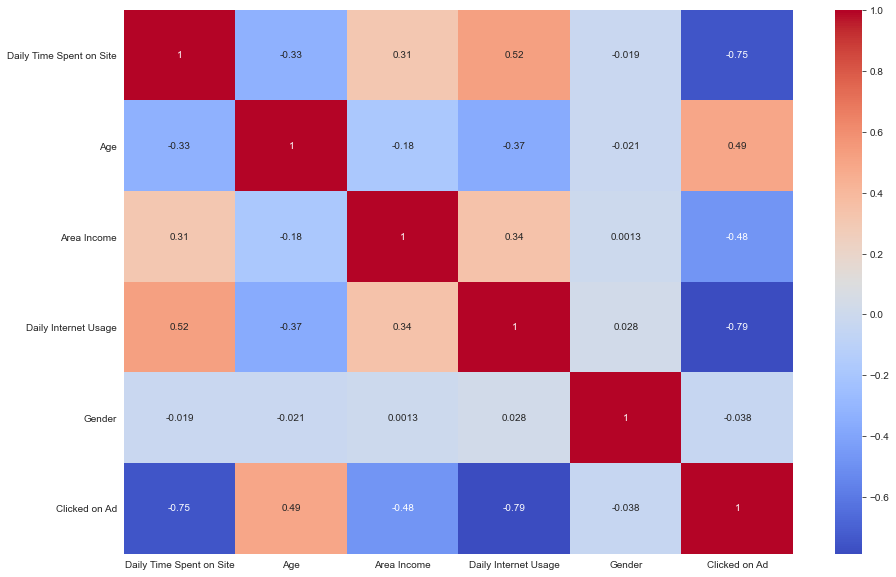

In [100]:
a=df.corr()
plt.figure(figsize=(15,10))

sns.heatmap(a,annot=True,cmap=plt.cm.coolwarm)

plt.show()

# Conclusion

In [ ]:
1. 19 years old is the minimum age of people in the dataset and the maximum age is 61
3. 50% of the people are watching the ad and 50% are not watching the ad while visiting the site
4. The average area income of the people according to gender wise is almost same(male=55018.41,female=54982.93)
5. 95% senior people(age is greater than 50) are clicking on ads while visiting the site(total number of senior people=72,number of senior people clicking the ad=69)
6. The average area income of people who clicking the ad is less than the avg. area income of people not clicking the ad(0: 61385.58641999997, 1: 48614.413739999996)
7. The average daily internet usage according to gender wise is almost same(male=49.5% and female=50.3%)
8. Age range of the people who use the internet most is between 20 to 35
9. Best time where people are watching the ad is between 7 pm to 12 pm
10.Average of Daily Time Spent on Site According to gender wise is almost same(female=65.2,male=64.6)
11.The analysis shows that there are less chance for clicking on ad when one person is spending more time on site
